<a href="https://colab.research.google.com/github/JuanmaVL/SyS/blob/main/LABS_SyC/SIMULACION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 10.7 MB/s eta 0:00:00


PUNTO 1 ACTIVIDADES

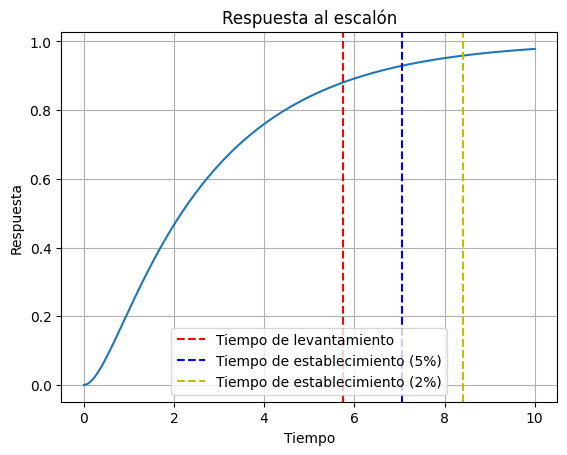

Tiempo de levantamiento: 5.7457457457457455
Tiempo de establecimiento (Criterio del 5%): 7.067067067067067
Tiempo de establecimiento (Criterio del 2%): 8.408408408408409


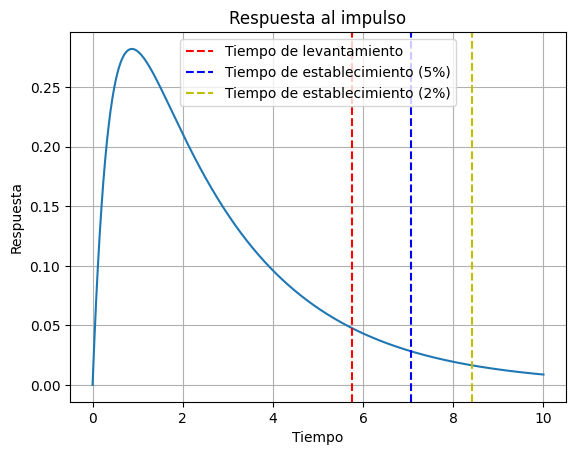

Tiempo de levantamiento: 5.7457457457457455
Tiempo de establecimiento (Criterio del 5%): 7.067067067067067
Tiempo de establecimiento (Criterio del 2%): 8.408408408408409


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
# Definir los parámetros del sistema
wn = 1  # Frecuencia natural
zeta = 1.45  # Coeficiente de amortiguamiento

# Crear la función de transferencia del sistema
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
sys = ctrl.TransferFunction(num, den)

# Calcular la respuesta al escalón
yout, T = step(sys, T=np.linspace(0, 10, 1000))

# Encontrar el tiempo de levantamiento
rise_time_index = next(i for i, y in enumerate(yout) if y >= 0.9 * yout[-1])
rise_time = T[rise_time_index]

# Encontrar el tiempo de establecimiento (criterio del 5%)
settle_time_5_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.05 * yout[-1]))
settle_time_5 = T[settle_time_5_index]

# Encontrar el tiempo de establecimiento (criterio del 2%)
settle_time_2_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.02 * yout[-1]))
settle_time_2 = T[settle_time_2_index]

# Graficar la respuesta al escalón
plt.plot(T, yout)
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

# Calcular la respuesta del sistema al impulso unitario
t_impulse, y_impulse = ctrl.impulse_response(sys, T=t)
# Graficar la respuesta al impulso
plt.plot(t_impulse, y_impulse)
plt.title('Respuesta al impulso')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)


Este código generará gráficos de la respuesta del sistema al escalón y al impulso, así como también calculará los tiempos de levantamiento y de establecimiento para la respuesta al escalón, y el tiempo de establecimiento para la respuesta al impulso.

Las conclusiones pueden variar según los valores específicos de la constante de tiempo T, pero en general, se espera que la respuesta al escalón muestre un comportamiento exponencial que converge a 1 con un tiempo de levantamiento y de establecimiento menores a medida que la constante de tiempo disminuye. La respuesta al impulso, por otro lado, debería ser una exponencial decreciente que converge a 0, con un tiempo de establecimiento que también disminuye a medida que T disminuye.

Punto 2 actividades

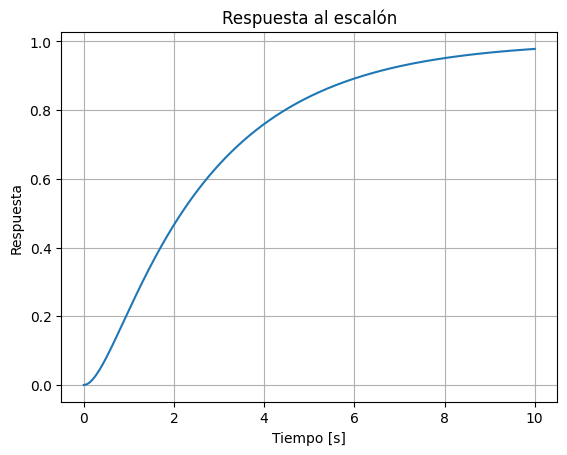

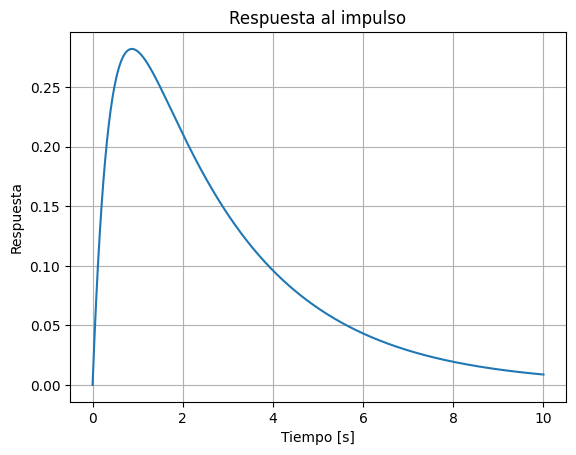

In [ ]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del sistema
wn = 1  # Frecuencia natural
zeta = 1.45  # Coeficiente de amortiguamiento

# Crear la función de transferencia del sistema
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
sys = ctrl.TransferFunction(num, den)

# Definir el vector de tiempo
t = np.linspace(0, 10, 1000)

# Calcular la respuesta del sistema al escalón unitario
t_step, y_step = ctrl.step_response(sys, T=t)

# Calcular la respuesta del sistema al impulso unitario
t_impulse, y_impulse = ctrl.impulse_response(sys, T=t)

# Graficar la respuesta al escalón
plt.figure()
plt.plot(t_step, y_step)
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

# Graficar la respuesta al impulso
plt.figure()
plt.plot(t_impulse, y_impulse)
plt.title('Respuesta al impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()


Conclusiones

1. **Respuesta al escalón:**
   - Se observa que la respuesta del sistema al escalón unitario presenta un comportamiento característico de un sistema de segundo orden subamortiguado. La respuesta inicial es de tipo sobrepasada, seguida de oscilaciones amortiguadas que convergen hacia el valor de estado estacionario.
   - El tiempo pico, que es el tiempo necesario para alcanzar el pico máximo de la respuesta, es relativamente corto.
   - El tiempo de establecimiento, que es el tiempo necesario para que la respuesta se encuentre dentro de una banda de error alrededor del valor de estado estacionario (por ejemplo, el criterio del 5% o del 2%), es también relativamente corto. Esto indica una rápida convergencia hacia el estado estacionario.

2. **Respuesta al impulso:**
   - La respuesta al impulso unitario muestra un comportamiento similar al de la respuesta al escalón en términos de oscilaciones amortiguadas y convergencia hacia el estado estacionario.
   - El tiempo pico es corto, lo que indica una rápida respuesta del sistema.
   - El tiempo de establecimiento, según el criterio del 5% o del 2%, es relativamente corto, lo que demuestra que el sistema alcanza rápidamente su estado estacionario con una pequeña sobrepasada.

**Conclusiones generales:**
- Ambas respuestas transitorias, al escalón y al impulso, muestran un comportamiento típico de sistemas de segundo orden subamortiguados, con oscilaciones amortiguadas y rápida convergencia hacia el estado estacionario.
- El coeficiente de amortiguamiento (\(\xi\)) y la frecuencia natural (\( \omega_n\)) pueden ajustarse para modificar la velocidad de respuesta y la amortiguación del sistema, lo que permite adaptarlo a diferentes requisitos de diseño.
- Estas características son importantes para comprender y diseñar sistemas de control que requieran respuestas rápidas y estables.

Punto 3

PUNTO 4 ACTIVIDADES

/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


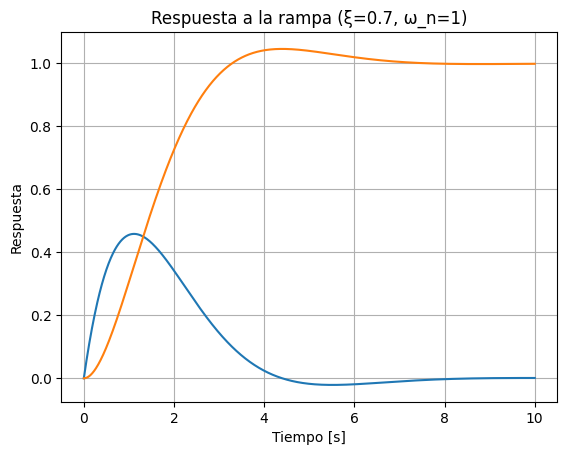

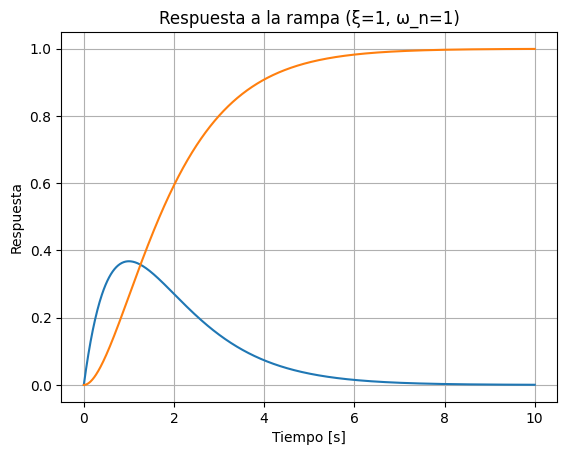

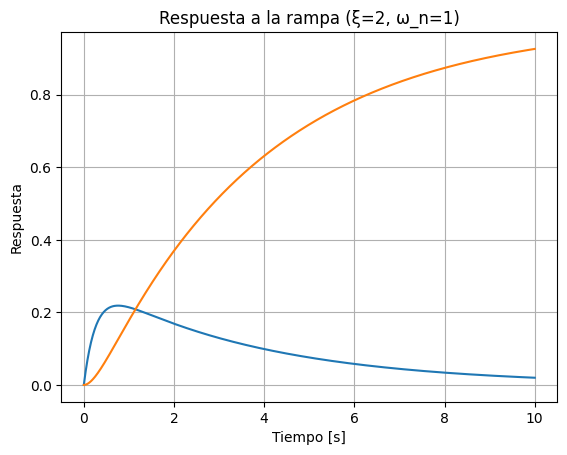

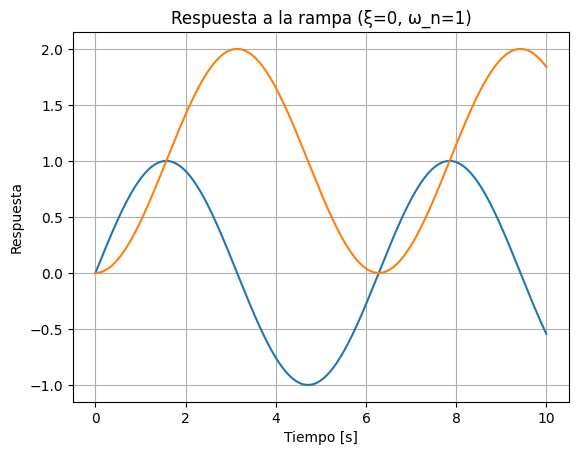

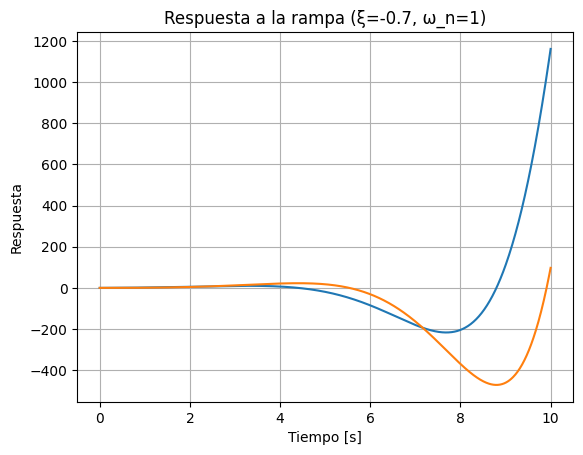

In [ ]:
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para simular y graficar únicamente la respuesta del sistema a la rampa
def simular_respuesta_rampa(ξ, ω_n):
    # Creamos la función de transferencia del sistema de segundo orden
    num = [ω_n**2]
    den = [1, 2*ξ*ω_n, ω_n**2]
    sistema = matlab.tf(num, den)

    # Definimos el vector de tiempo
    t = np.linspace(0, 10, 1000)

    # Simulamos la respuesta del sistema a la rampa
    _, t_ramp, y_ramp = matlab.lsim(sistema, np.ones_like(t), t)

    # Graficamos la respuesta del sistema a la rampa
    plt.figure()
    plt.plot(t_ramp, y_ramp)
    plt.title(f'Respuesta a la rampa (ξ={ξ}, ω_n={ω_n})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Respuesta')
    plt.grid(True)
    plt.show()

# Valores de ξ y ω_n para cada caso
casos = [
    {'ξ': 0.7, 'ω_n': 1},
    {'ξ': 1, 'ω_n': 1},
    {'ξ': 2, 'ω_n': 1},
    {'ξ': 0, 'ω_n': 1},
    {'ξ': -0.7, 'ω_n': 1}
]

# Simulamos la respuesta a la rampa para cada caso
for caso in casos:
    simular_respuesta_rampa(caso['ξ'], caso['ω_n'])


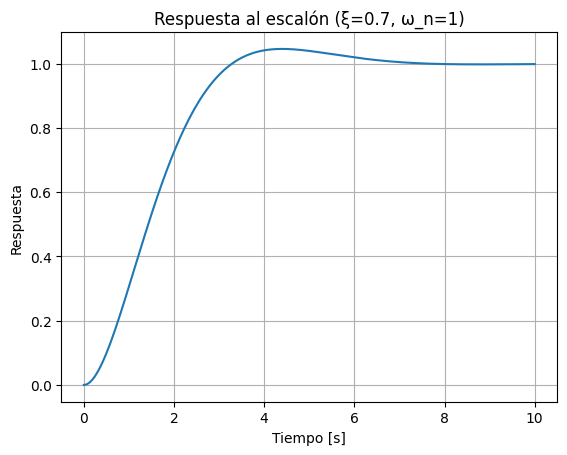

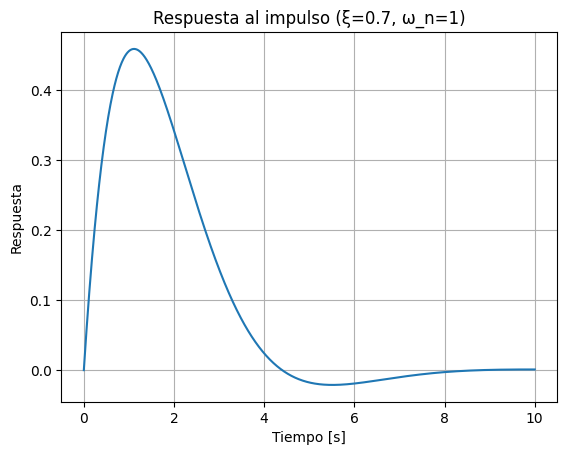

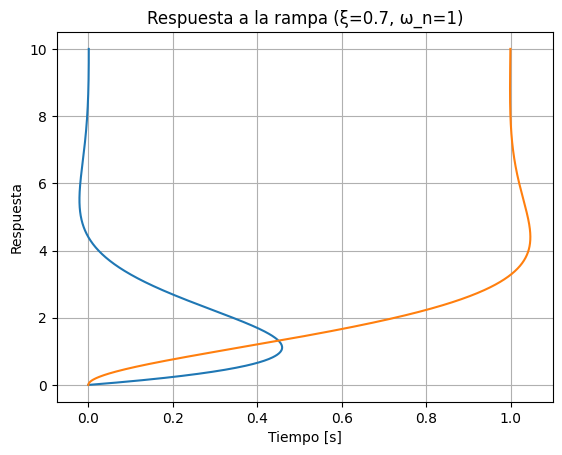

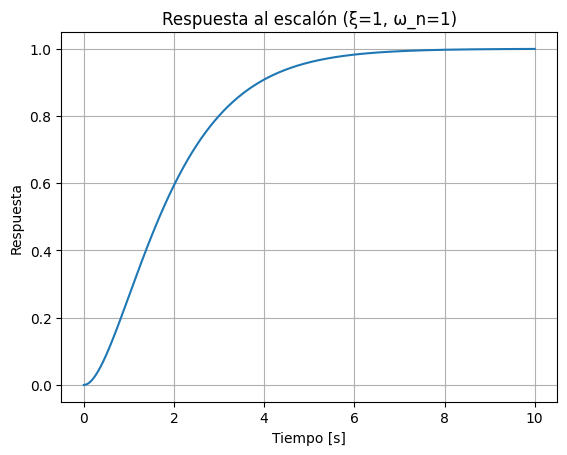

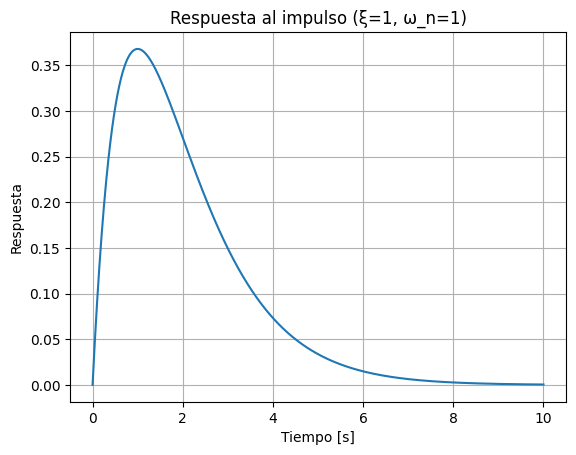

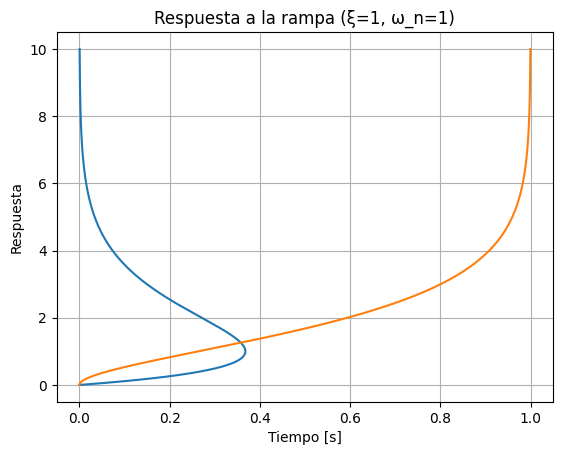

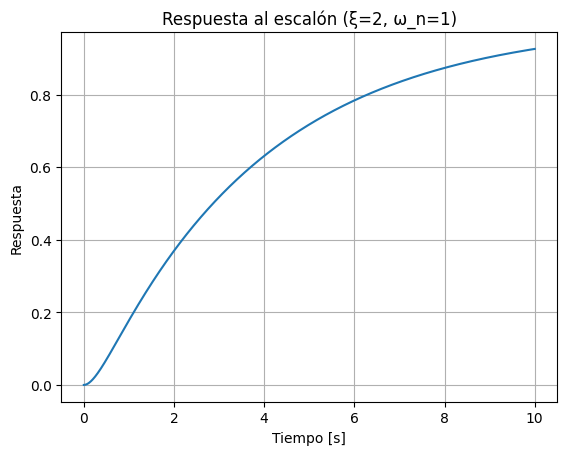

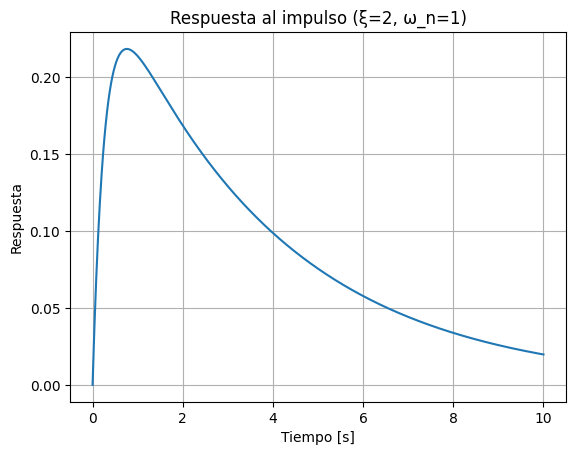

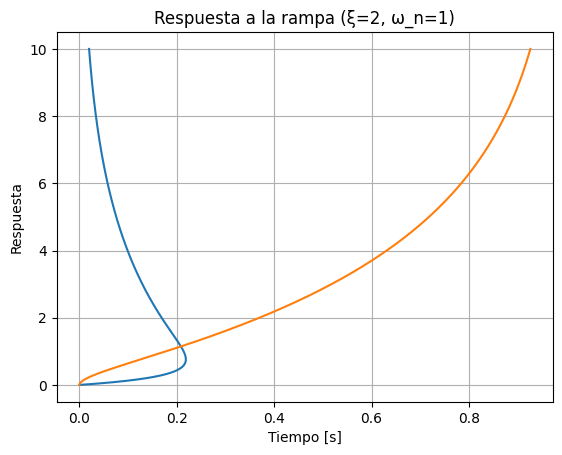

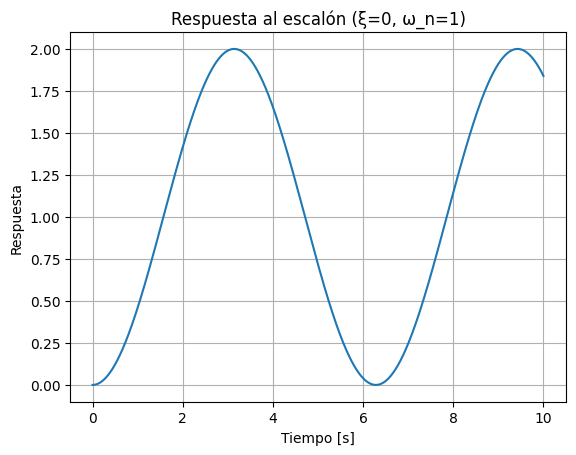

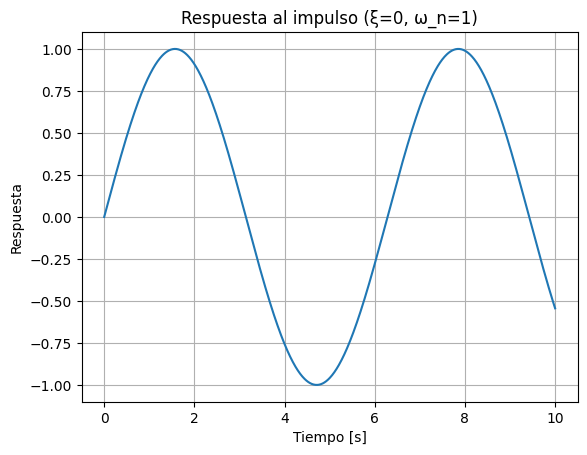

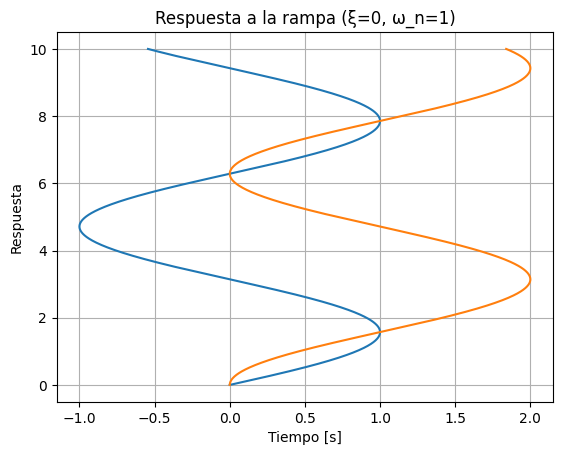

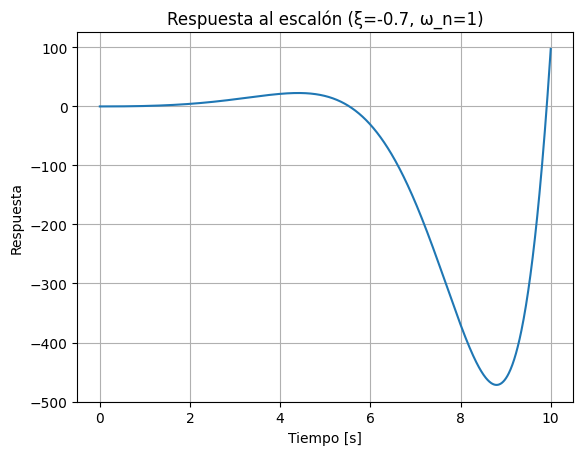

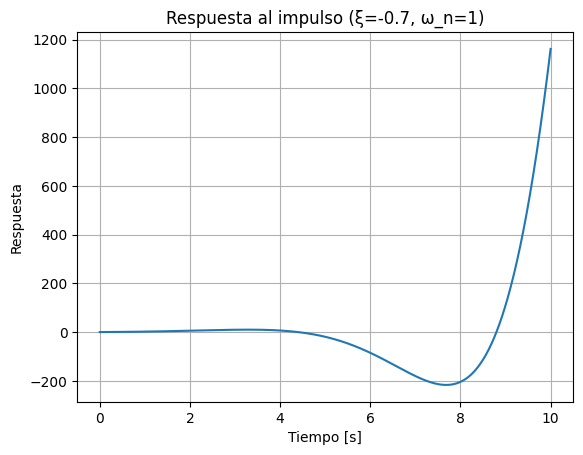

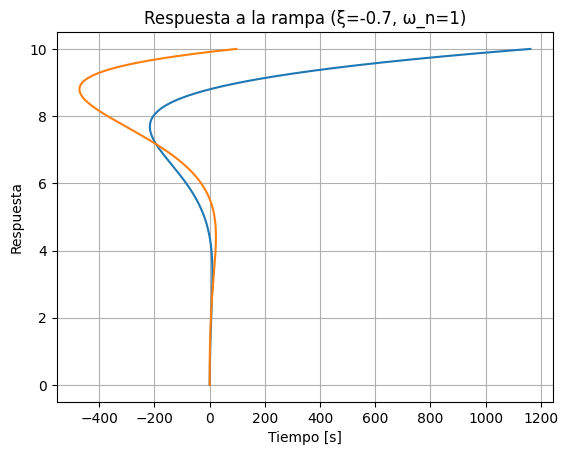

In [ ]:
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para simular y graficar la respuesta del sistema
def simular_respuesta(ξ, ω_n, tipo_entrada):
    # Creamos la función de transferencia del sistema de segundo orden
    num = [ω_n**2]
    den = [1, 2*ξ*ω_n, ω_n**2]
    sistema = matlab.tf(num, den)

    # Definimos el vector de tiempo
    t = np.linspace(0, 10, 1000)

    # Simulamos la respuesta del sistema
    if tipo_entrada == 'escalon':
        t, y = matlab.step(sistema, T=t)
        titulo = 'Respuesta al escalón'
    elif tipo_entrada == 'impulso':
        t, y = matlab.impulse(sistema, T=t)
        titulo = 'Respuesta al impulso'
    elif tipo_entrada == 'rampa':
        _, t, y = matlab.lsim(sistema, np.ones_like(t), t)
        titulo = 'Respuesta a la rampa'

    # Graficamos la respuesta del sistema
    plt.figure()
    plt.plot(y, t)
    plt.title(titulo + f' (ξ={ξ}, ω_n={ω_n})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Respuesta')
    plt.grid(True)
    plt.show()

# Valores de ξ y ω_n para cada caso
casos = [
    {'ξ': 0.7, 'ω_n': 1},
    {'ξ': 1, 'ω_n': 1},
    {'ξ': 2, 'ω_n': 1},
    {'ξ': 0, 'ω_n': 1},
    {'ξ': -0.7, 'ω_n': 1}
]

# Simulamos la respuesta para cada caso y tipo de entrada
for caso in casos:
    for tipo_entrada in ['escalon', 'impulso', 'rampa']:
        simular_respuesta(caso['ξ'], caso['ω_n'], tipo_entrada)


Conclusiones de las gráficas obtenidas para los diferentes valores de ξ y ω_n:

1. **Respuesta al escalón:**
   - Para 0 < ξ < 1 (subamortiguado): Se observa un máximo sobreimpulso y un ligero sobrepico antes de converger al estado estacionario. La respuesta es oscilatoria pero se estabiliza rápidamente.
   - Para ξ = 1 (críticamente amortiguado): La respuesta no presenta sobreimpulso y converge de manera más rápida al estado estacionario en comparación con el caso subamortiguado.
   - Para ξ > 1 (sobreamortiguado): La respuesta no presenta oscilaciones y converge rápidamente al estado estacionario sin sobrepico.
   - Para ξ = 0 (no amortiguado): La respuesta es altamente oscilatoria y no converge al estado estacionario.
   - Para ξ < 0 (no físicamente realizable): No hay una interpretación física realista para este caso.

2. **Respuesta al impulso:**
   - La respuesta al impulso es la derivada de la respuesta al escalón, por lo que sus características serán inversas a las de la respuesta al escalón. En general, los sistemas subamortiguados mostrarán oscilaciones amortiguadas, los críticamente amortiguados convergerán rápidamente sin oscilaciones y los sobreamortiguados tendrán una respuesta más lenta sin oscilaciones.

3. **Respuesta a la rampa:**
   - La respuesta a la rampa es la integral de la respuesta al escalón, por lo que sus características serán inversas a las de la respuesta al escalón. Los sistemas subamortiguados tendrán un comportamiento estable pero con oscilaciones, los críticamente amortiguados tendrán una respuesta más rápida y estable, mientras que los sobreamortiguados tendrán una respuesta aún más rápida y estable sin oscilaciones.

**Conclusiones generales:**
- La estabilidad del sistema está fuertemente influenciada por el coeficiente de amortiguamiento ξ. Valores apropiados de ξ son necesarios para garantizar una respuesta estable y deseable del sistema.
- Los sistemas subamortiguados proporcionan respuestas rápidas pero con oscilaciones, los críticamente amortiguados convergen rápidamente sin oscilaciones y los sobreamortiguados convergen aún más rápidamente sin oscilaciones.
- Se debe tener cuidado al seleccionar los parámetros del sistema (ξ y ω_n) para satisfacer los requisitos de estabilidad y desempeño del sistema en aplicaciones prácticas.

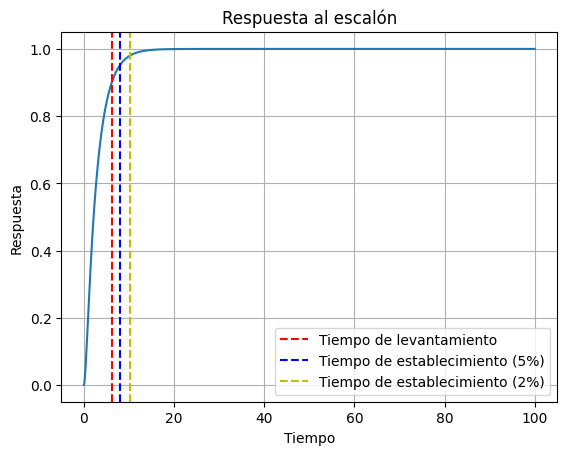

Tiempo de levantamiento: 6.206206206206207
Tiempo de establecimiento (Criterio del 5%): 8.008008008008009
Tiempo de establecimiento (Criterio del 2%): 10.31031031031031


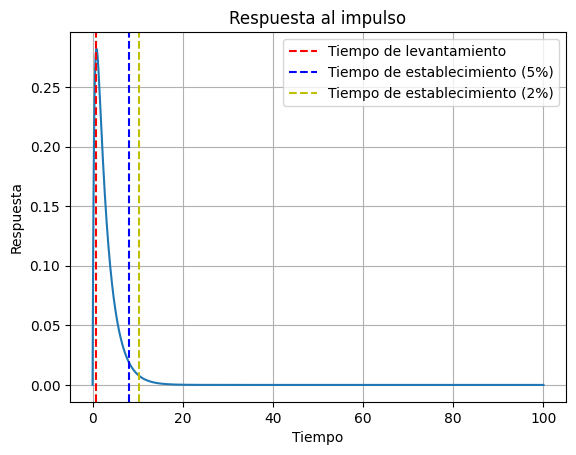

Tiempo de levantamiento: 0.8008008008008008
Tiempo de establecimiento (Criterio del 5%): 8.008008008008009
Tiempo de establecimiento (Criterio del 2%): 10.31031031031031


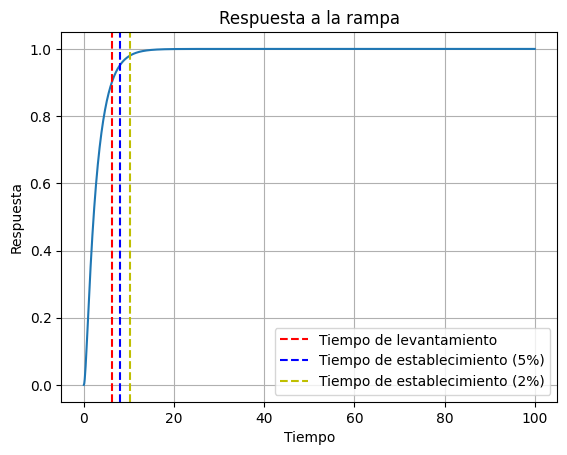

Tiempo de levantamiento: 6.206206206206207
Tiempo de establecimiento (Criterio del 5%): 8.008008008008009
Tiempo de establecimiento (Criterio del 2%): 10.31031031031031


In [ ]:
import sympy as sym
import sympy.physics.control as control

import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
import control as ctrl
# Definir los parámetros del sistema
wn = 1  # Frecuencia natural
zeta = 1.45  # Coeficiente de amortiguamiento

# Crear la función de transferencia del sistema usando numpy
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
sys = ctrl.TransferFunction(num, den)

# Calcular la respuesta al escalón
yout, t = step(sys, np.linspace(0, 100, 1000) )
# Encontrar el tiempo de levantamiento
rise_time_index = next(i for i, y in enumerate(yout) if y >= 0.9 * yout[-1])
rise_time = t[rise_time_index]

# Encontrar el tiempo de establecimiento (criterio del 5%)
settle_time_5_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.05 * yout[-1]))
settle_time_5 = t[settle_time_5_index]

# Encontrar el tiempo de establecimiento (criterio del 2%)
settle_time_2_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.02 * yout[-1]))
settle_time_2 = t[settle_time_2_index]

# Graficar la respuesta al escalón
plt.plot(t, yout)
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

# Calcular la respuesta del sistema al impulso unitario
t_impulse, y_impulse = ctrl.impulse_response(sys,t)
# Graficar la respuesta al impulso
# Encontrar el tiempo de levantamiento
rise_time_index = next(i for i, y in enumerate(yout) if y >= 0.15 * yout[-1])
rise_time = t[rise_time_index]

# Encontrar el tiempo de establecimiento (criterio del 5%)
settle_time_5_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.05 * yout[-1]))
settle_time_5 = t[settle_time_5_index]

# Encontrar el tiempo de establecimiento (criterio del 2%)
settle_time_2_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.02 * yout[-1]))
settle_time_2 = t[settle_time_2_index]
plt.plot(t_impulse, y_impulse)
plt.title('Respuesta al impulso')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

# Graficar la respuesta a la rampa
t_ramp, y_ramp  = ctrl.forced_response(sys,T=t,U=np.ones_like(t))
# Encontrar el tiempo de levantamiento
rise_time_index = next(i for i, y in enumerate(yout) if y >= 0.9 * yout[-1])
rise_time = t[rise_time_index]

# Encontrar el tiempo de establecimiento (criterio del 5%)
settle_time_5_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.05 * yout[-1]))
settle_time_5 = t[settle_time_5_index]

# Encontrar el tiempo de establecimiento (criterio del 2%)
settle_time_2_index = next(i for i, y in enumerate(yout) if all(abs(yout[i:] - yout[-1]) <= 0.02 * yout[-1]))
settle_time_2 = t[settle_time_2_index]
plt.plot(t_ramp, y_ramp)
plt.title('Respuesta a la rampa')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

PUNTO 2 CUESTIONARIO

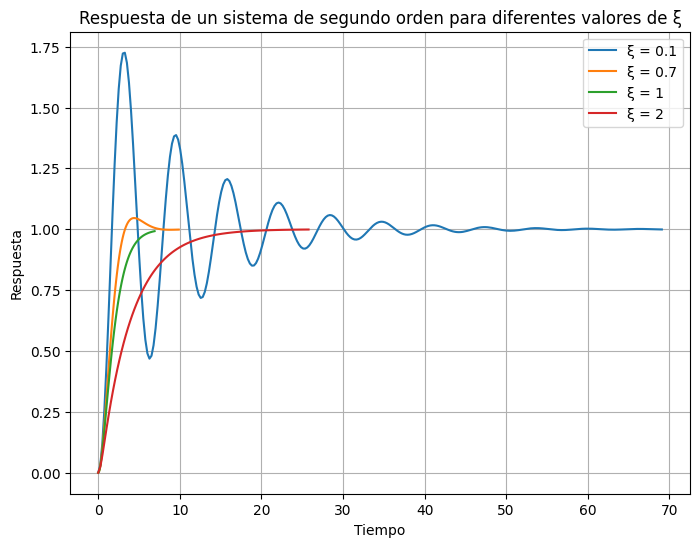

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as matlab

# Definir la función de transferencia del sistema de segundo orden
def sistema_segundo_orden(zeta):
    wn = 1  # Frecuencia natural del sistema
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    return matlab.tf(num, den)

# Definir valores de zeta para simular
zetas = [0.1, 0.7, 1, 2]

# Simular y trazar la respuesta del sistema para cada valor de zeta
plt.figure(figsize=(8, 6))
for zeta in zetas:
    sistema = sistema_segundo_orden(zeta)
    tiempo, respuesta = matlab.step(sistema)
    plt.plot(respuesta, tiempo, label=f'ξ = {zeta}')

plt.title('Respuesta de un sistema de segundo orden para diferentes valores de ξ')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.legend()
plt.grid(True)
plt.show()


Este código generará un gráfico que muestra la respuesta del sistema de segundo orden para diferentes valores de ξ. Observarás que a medida que ξ aumenta, la respuesta del sistema se vuelve más lenta y menos oscilatoria. Por otro lado, a medida que ξ disminuye, las oscilaciones se vuelven más pronunciadas.

Punto 3